## Problem Statement

An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. 

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed
    
    
The target statment is to build a logistic regression model for the above dataset and predict if a person with age 50 and 25 will pass the test or not?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


### Exploratory Data Analysis (EDA)

We will check the total number of 1's and 0's in the target column for our dataset and visualize that.

<AxesSubplot:xlabel='test_result', ylabel='count'>

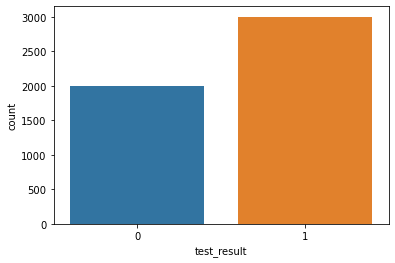

In [5]:
sns.countplot(x='test_result', data = df)

Thus, it is pretty clear that number of people who pass the test are more than those who do not pass it. Let us see how does it matter based on the features age and physical score.

<AxesSubplot:xlabel='test_result', ylabel='age'>

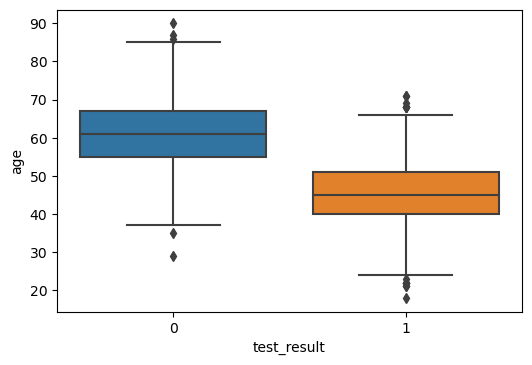

In [6]:
plt.figure(dpi=100)
sns.boxplot(x='test_result', y = 'age', data=df)

<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

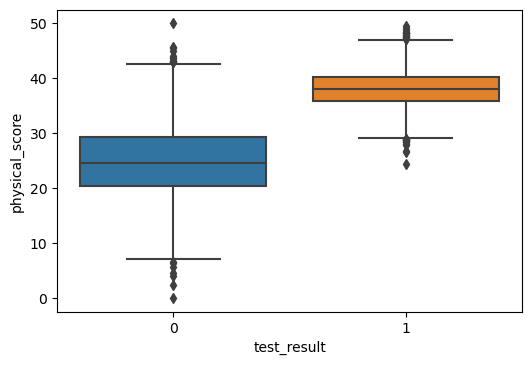

In [7]:
plt.figure(dpi=100)
sns.boxplot(x='test_result', y = 'physical_score', data=df)

From the above two boxplots, it seems that lower age people having a greater physical score pass the test. Let us gain more inssight on it using a heatmap.

<AxesSubplot:>

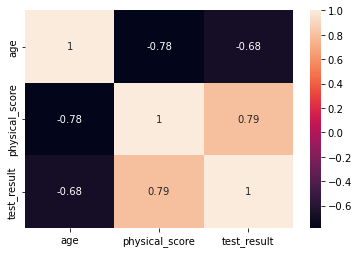

In [8]:
sns.heatmap(df.corr(), data=df, annot = True)

From the heat map, we see that physical_Score has a positive correlation with test_result whereas age has a negative correlation, thus supporting our observations from the above boxplots.

But what about the relation between age and physical score? Let us visualize that using a scatter plot.

<AxesSubplot:xlabel='age', ylabel='physical_score'>

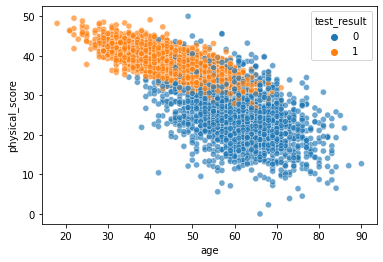

In [9]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result', alpha = 0.65)

Thus as expected, with increasing age physical score tends to decrease as per our dataset.

For the final graph, let us plot all three columns together to view the trend.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


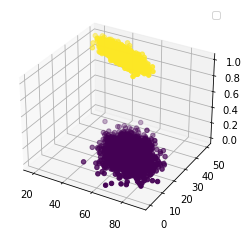

In [10]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])
plt.legend()

Thus, it is clearly evident from the 3D Plot that we only have 0's and 1's in the target column.

### Logistic Regression Model

**Train Test Split**

In [11]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**Building the Regression Model**

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_model = LogisticRegression()

In [16]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

**Checking the coefficients**

In [18]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

This tells us that for the first feature, there seems to be an inverse relation between the feature and possibility of getting 1's, where our first feature is age. Also since the second coefficient is positive, it means the second feature has a direct relation with getting 1's as the target output. The last thing to note is that the magnitude of second feature is more then the first, implying it has more weight in deciding the outcome as 1's.

Also the above values are odds.This means:
* We can expect the **odds** of passing the test to **decrease** (the original coeff was negative) per unit increase of the age.
* We can expect the **odds** of passing the test to **increase** (the original coeff was positive) per unit increase of the physical score.

**Glancing the probabilities for our model on the test data**

In [21]:
log_model.predict_proba(scaled_X_test)

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

To understand the above probabilities value better, let us take into consideration the first value i.e. index at 0.

In [22]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02384343, 0.97615657])

The above array tells that the probability of getting output as 0 is 0.023 whereas the probability of getting 1 is 0.976. Also if we add the two probabilities, it will come out as 1 since the only possible outocmes for our model is either 0 or 1.

In [24]:
#Adding the two probabilites for the 0th index of our model's probabilities
sum_0_index =  log_model.predict_proba(scaled_X_test)[0][0] + log_model.predict_proba(scaled_X_test)[0][1]
sum_0_index

1.0

Lets us also check what is the output for the 0th index of the y_test.

In [25]:
y_test[0]

1

Thus we see that for the 0th test data (X_test) since our model gave the probability for getting 1 higher (log_model.predict_proba(scaled_X_test)[0][1]).

Let us check whether this is true for all 500 test values.


In [33]:
#creating a dictionary to store the expected value of the model for the test data based on probabilities
model_probabilities = []
for i in log_model.predict_proba(scaled_X_test):
    if i[0]>i[1]:
        model_probabilities.append(0)
    else:
        model_probabilities.append(1)


In [58]:
#creating dataframes for probabilities of X_test and y_test
df_mp = pd.DataFrame(model_probabilities)
df_mp.index = np.arange(1, len(df_mp) + 1)

df_yt = pd.DataFrame(y_test)
df_yt.index = np.arange(1, len(df_yt) + 1)

df_comparison = pd.concat([df_mp, df_yt],axis=1)
df_comparison.columns = ['model prob', 'test output']

#checking if the probability is related to test output
np.sum(df_comparison['model prob'] == df_comparison['test output'])

465

In [60]:
#lets check the value 465 in terms of percentage
percent_ = 465/len(y_test)*100

percent_

93.0

This means our model was 93% successful in capturing the output based on the probabilities. Let us find out in detail how good our model was.

### Estimating Model Performance

**Plotting the confusion matrix and finding accuracy**

We plot the confusion matrix as the above percent_ value does not comes out to be 100. This means there were some false positives and false negatives populated by our model on the test data, which can be seen using confusion matrix.

Accuracy is defined as sum of true positives and true negatives divided by the total length of data.

In [62]:
#importing the required libraries to check the model performace
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [64]:
y_pred = log_model.predict(scaled_X_test)
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

Here 293 is true positive, 172 is false negative, 14 is False Positive (i.e. it should have been labelled as negative) and 21 is False Negative (i.e. it should have been labelled as positive).

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


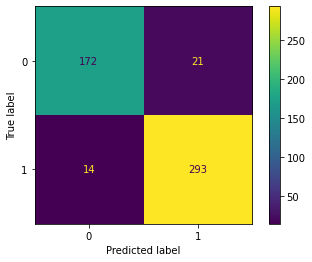

In [65]:
#plotting the confusion matrix
plot_confusion_matrix(log_model,scaled_X_test,y_test)

This tells us that there were 172 true negatives and 293 true positives. The sum of these two come out as 465 which match our values above. Also, this metric is what we call accuracy.

In [66]:
#inbuilt function to find accuracy (from above called libraries)
accuracy_score(y_test,y_pred)

0.93

**Recall**

Recall answers the question when it actually is a positive case, how often is the model showing it as correct. 

Recall is thus calculated by taking the number of true positives and dividing it by actual positives. (A recall od 0 tells the model is biased towards the majority class - although we should check this for both 1's and 0's)

In [86]:
recall = confusion_matrix(y_test,y_pred)[1][1]/(confusion_matrix(y_test,y_pred)[1][1]+confusion_matrix(y_test,y_pred)[1][0])

In [87]:
round(recall,3)

0.954

**Precision**

Precision answers the question When the prediction is positive, how often the model prediction is correct.

Precision is calculated as taking the number of true positives and dividing it by total number of positives.

In [88]:
precision = confusion_matrix(y_test,y_pred)[1][1]/(confusion_matrix(y_test,y_pred)[1][1]+confusion_matrix(y_test,y_pred)[0][1])

In [89]:
round(precision,2)

0.93

**We can also find recall and precision using the built in fucntion from the above called out libraries**

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



**Evaluating AUC**

This curve shows the curve for True Positive Rate Vs False Postive Rate.

In a Receiver Operator Curve, a higher X-axis value indicates a higher number of False positives than True negatives. While a higher Y-axis value indicates a higher number of True positives than False negatives.

The false positive rate is calculated as FP/(FP+TN).

The true positive rate (or sensitivity) is calculated as TPR=TP/(TP+FN).

In [91]:
from sklearn.metrics import plot_roc_curve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


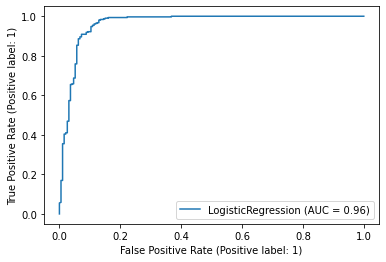

In [92]:
plot_roc_curve(log_model,scaled_X_test,y_test)

Since in the ROC curve, the line is above the y=x line, it can be interpreted that there are way more True positives (293) as compared to False positives (14).

### Predicting values for the problem statement

We will have to use all the feature rows to train our model this time without scaling so that we could enter the inputs 50,25 from the problem statement

In [106]:
log_model_final = LogisticRegression()

In [107]:
log_model_final.fit(X,y)

LogisticRegression()

In [108]:
print(log_model_final.predict(np.array([[50,25]])))

[0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Thus, our candidate having age of 50 and physical score of 25 seems to fail the test!